In [53]:
%load_ext autoreload
%autoreload 2
from Graph.GenomeAssembler import GenomeAssembler
%reload_ext gvmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
def GraphToDot(graph):
    dot_str = 'digraph "Test" { \n'
    for vertex in graph.vertices.values():
        if(len(vertex.incoming_edges)>0 or len(vertex.outcoming_edges) > 0):
            dot_str += f'  {vertex} [label="{len(vertex.incoming_edges)}, {len(vertex.outcoming_edges)}"] ;\n'
    for edge in graph.edges.values():
        if(edge is not None):
            dot_str += f'{edge.source} -> {edge.destination} [label="c: {round(edge.coverage/edge.kmer_count, 1)}, l: {edge.kmer_count}"];\n'
    dot_str+= "} \n"
    return dot_str

In [55]:
def Visualize(genomeAssembler):
    genomeAssembler.Assemble()
    %dotstr GraphToDot(genomeAssembler.graph)
    from IPython.core.display import Image, display
    display(Image('file.png'))

### 1000 ридов

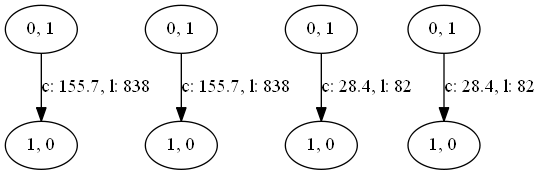

In [58]:
genomeAssembler = GenomeAssembler("TestData/s_6.first1000.fastq", "output_1000.fasta", k = 55, removeSmallEndingEdges=True, removeLowCoveredEdges=True, minAverageCoverage=10, minEdgeLength=10)
Visualize(genomeAssembler)

### 10 000 ридов

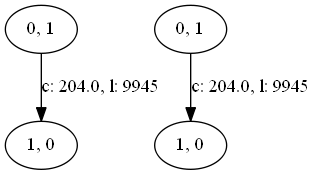

In [52]:
genomeAssembler = GenomeAssembler("TestData/s_6.first10000.fastq", "output_10000.fasta", k = 55, removeSmallEndingEdges=True, removeLowCoveredEdges=True, minAverageCoverage=10, minEdgeLength=10)
Visualize(genomeAssembler)

### 100 000 ридов

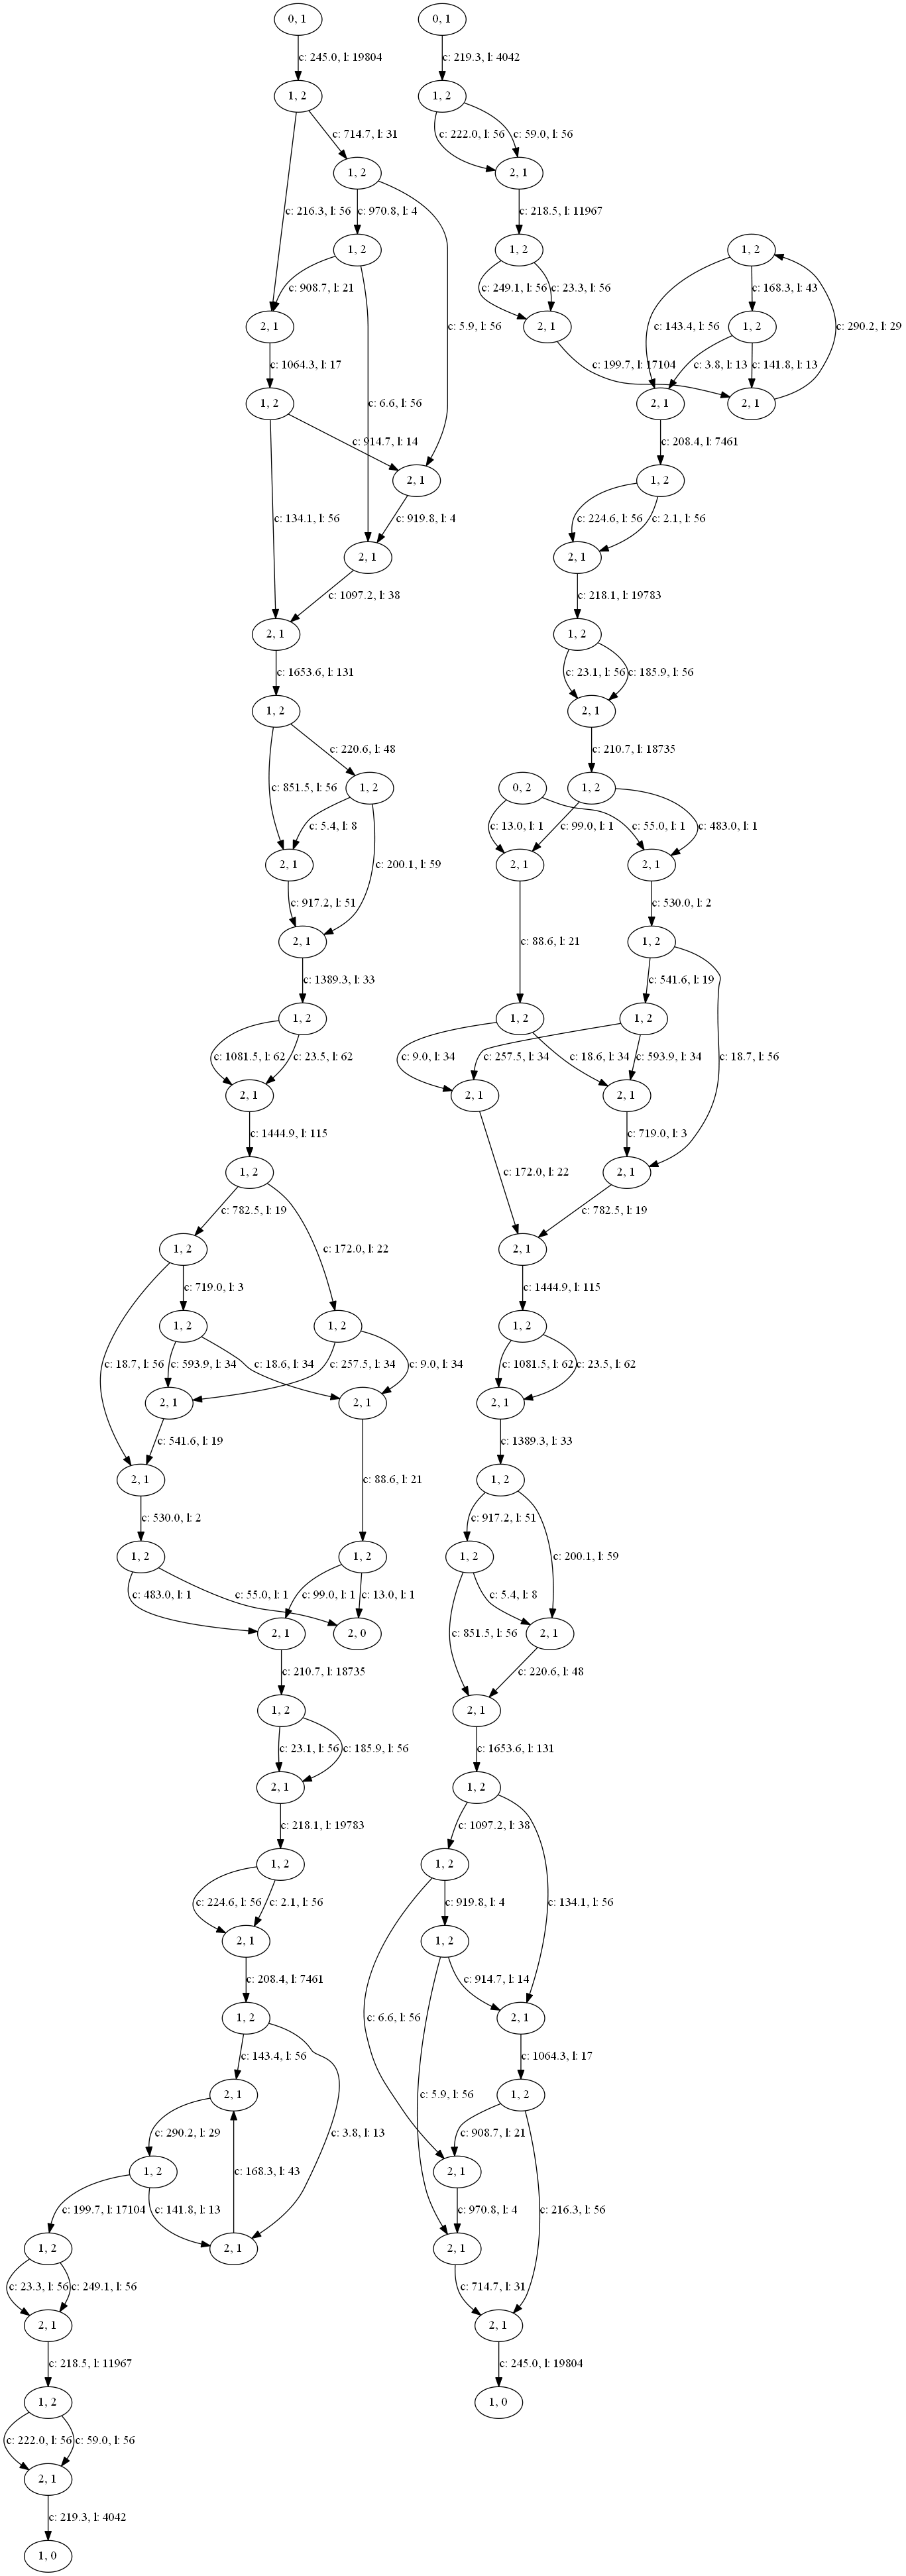

In [60]:
genomeAssembler = GenomeAssembler("TestData/s_6.first100000.fastq", "output_100000.fasta", k = 55, removeSmallEndingEdges=True, removeLowCoveredEdges=True, minAverageCoverage=50, minEdgeLength=20)
Visualize(genomeAssembler)